In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_excel('personal-financial-status.xlsx')
data = data.dropna(axis = 0, thresh = 4)
data = data.dropna(axis = 1, thresh = 1)
data["Date"] = data["Date"].dt.strftime("%d/%m/%y")
data

,Date,Purchase,Category,"Payment Method (Cash:0, Card:1)",Cost,Quantity,Total,Receive,"Receive Method (Cash:0, Card:1)",Remaining (Cash),Remaining (Card),Unnamed: 11,Unnamed: 12
0,01/04/21,Road tickets,Toll road,0.0,25000.0,2.0,50000,0.0,NaN,1950000,4000000,Total money in cash:,2000000.0
1,01/04/21,Dimsum,Food,0.0,15000.0,2.0,30000,0.0,NaN,1920000,4000000,Total money in card:,4000000.0
2,01/04/21,Parking ticket,Parking,0.0,5000.0,1.0,5000,0.0,NaN,1915000,4000000,NaN,NaN
3,01/04/21,Water box,Drink,1.0,95000.0,1.0,95000,0.0,NaN,1915000,3905000,NaN,NaN
4,01/04/21,Burgers,Food,1.0,15000.0,3.0,45000,0.0,NaN,1915000,3860000,NaN,NaN
5,02/04/21,Transfer,Transfer,1.0,110000.0,1.0,110000,0.0,NaN,1915000,3750000,NaN,NaN
6,03/04/21,Parking ticket,Parking,0.0,5000.0,1.0,5000,0.0,NaN,1910000,3750000,NaN,NaN
7,05/04/21,Grab Bike,Grab,0.0,44000.0,1.0,44000,0.0,NaN,1866000,3750000,NaN,NaN
8,05/04/21,Car's ambient light,Others,1.0,3600000.0,1.0,3600000,0.0,NaN,1866000,150000,NaN,NaN
9,06/04/21,Water bottle,Friends,0.0,120000.0,1.0,120000,0.0,NaN,1746000,150000,NaN,NaN


In [3]:
total_cash = pd.read_excel('personal-financial-status.xlsx').iloc[0, 12]
total_card = pd.read_excel('personal-financial-status.xlsx').iloc[1, 12]

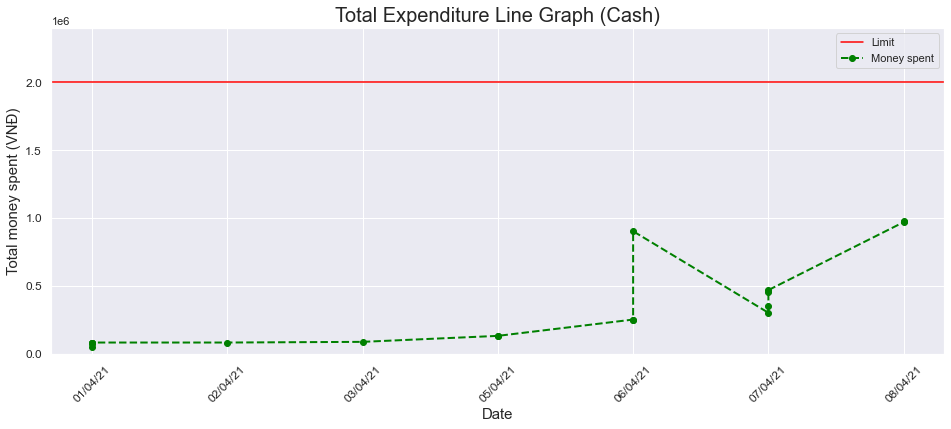

In [4]:
plt.axhline(y = total_cash, color = "red")
plt.plot(data.Date, total_cash - data["Remaining (Cash)"], linestyle = "dashed", linewidth = 2, marker = "o", color = "green")
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Total money spent (VNĐ)", fontsize = 15)
ylim = total_cash + (20 * total_cash) / 100
plt.ylim([0, ylim])
fig = plt.gcf()
fig.set_size_inches(16,6, forward = False)
plt.title("Total Expenditure Line Graph (Cash)", fontsize = 20)
plt.legend(["Limit", "Money spent"])
plt.show()

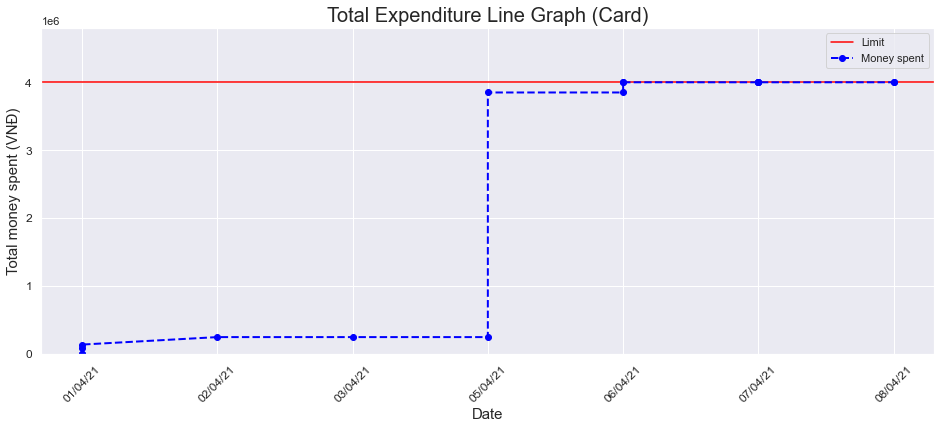

In [5]:
plt.axhline(y = total_card, color = "red")
plt.plot(data.Date, total_card - data["Remaining (Card)"], linestyle = "dashed", linewidth = 2, marker = "o", color = "blue")
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Total money spent (VNĐ)", fontsize = 15)
ylim = total_card + (20 * total_card) / 100
plt.ylim([0, ylim])
fig = plt.gcf()
fig.set_size_inches(16,6, forward = False)
plt.title("Total Expenditure Line Graph (Card)", fontsize = 20)
plt.legend(["Limit", "Money spent"])
plt.show()

In [6]:
cash_payments = list()
card_payments = list()
cash_payment_categories = list()
card_payment_categories = list()
for i in range(len(data)):
    if data["Payment Method (Cash:0, Card:1)"].to_list()[i] == 0:
        cash_payments.append(data.Total.to_list()[i])
    elif data["Payment Method (Cash:0, Card:1)"].to_list()[i] == 1:
        card_payments.append(data.Total.to_list()[i])
for i in range(len(data)):
    if data["Payment Method (Cash:0, Card:1)"].to_list()[i] == 0 and data.Total.to_list()[i] != 0:
        cash_payment_categories.append(data.Category[i])
    elif data["Payment Method (Cash:0, Card:1)"].to_list()[i] == 1 and data.Total.to_list()[i] != 0:
        card_payment_categories.append(data.Category[i])
cash_payments = [i for i in cash_payments if i != 0]
card_payments = [i for i in card_payments if i != 0]

In [7]:
cash_category_duplicate = dict()
card_category_duplicate = dict()
for i in range(len(cash_payment_categories)):
    if cash_payment_categories[i] in cash_category_duplicate:
        cash_category_duplicate[cash_payment_categories[i]] += cash_payments[i]
    else:
        cash_category_duplicate[cash_payment_categories[i]] = cash_payments[i]
for i in range(len(card_payment_categories)):
    if card_payment_categories[i] in card_category_duplicate:
        card_category_duplicate[card_payment_categories[i]] += card_payments[i]
    else:
        card_category_duplicate[card_payment_categories[i]] = card_payments[i]
for i in range(len(data)):
    if data.Receive.to_list()[i] != 0 and data["Receive Method (Cash:0, Card:1)"].to_list()[i] == 0:
        cash_category_duplicate[data.Category.to_list()[i]] -= data.Receive.to_list()[i]
    elif data.Receive.to_list()[i] != 0 and data["Receive Method (Cash:0, Card:1)"].to_list()[i] == 1:
        card_category_duplicate[data.Category.to_list()[i]] -= data.Receive.to_list()[i]

In [8]:
if sum(cash_category_duplicate.values()) < total_cash:
    cash_category_duplicate["Remaining"] = total_cash - sum(cash_category_duplicate.values())
if sum(card_category_duplicate.values()) < total_card:
    card_category_duplicate["Remaining"] = total_card - sum(card_category_duplicate.values())

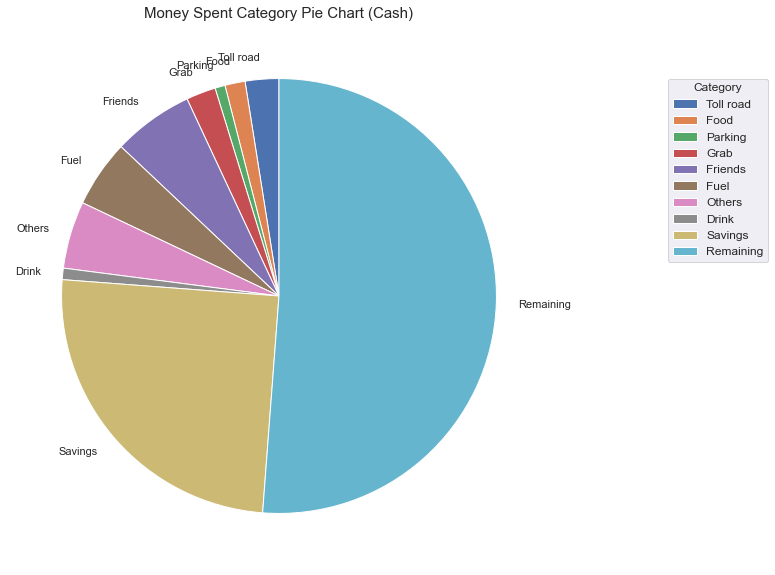

In [9]:
plt.pie(cash_category_duplicate.values(), labels = cash_category_duplicate.keys(), startangle = 90)
fig = plt.gcf()
fig.set_size_inches(10, 10, forward = False)
plt.legend(bbox_to_anchor=(1.4, 0.9),borderaxespad=0, title = "Category", fontsize = 12)
plt.title("Money Spent Category Pie Chart (Cash)", fontsize = 15)
plt.show()

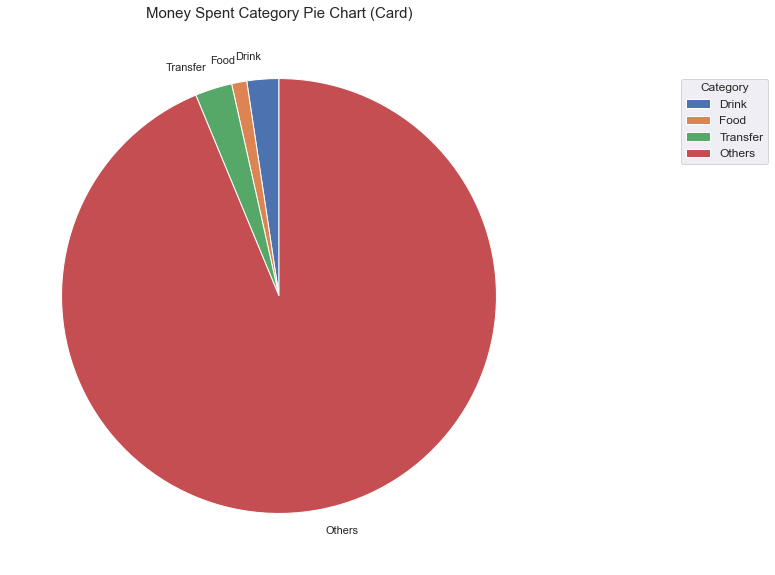

In [10]:
plt.pie(card_category_duplicate.values(), labels = card_category_duplicate.keys(), startangle = 90)
fig = plt.gcf()
fig.set_size_inches(10, 10, forward = False)
plt.legend(bbox_to_anchor=(1.4, 0.9),borderaxespad=0, title = "Category", fontsize = 12)
plt.title("Money Spent Category Pie Chart (Card)", fontsize = 15)
plt.show()

In [11]:
print("Top 3 highest expense (Cash):")
print("1: {category}: {cost} VNĐ ({percentage}%)".format(category = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][0][1], cost = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][0][0], percentage = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][0][0] / total_cash * 100))
print("2: {category}: {cost} VNĐ ({percentage}%)".format(category = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][1][1], cost = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][1][0], percentage = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][1][0] / total_cash * 100))
print("3: {category}: {cost} VNĐ ({percentage}%)".format(category = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][2][1], cost = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][2][0], percentage = sorted(zip(cash_payments, cash_payment_categories), reverse=True)[:3][2][0] / total_cash * 100))

Top 3 highest expense (Cash):
1: Fuel: 650000 VNĐ (32.5%)
2: Savings: 500000 VNĐ (25.0%)
3: Friends: 120000 VNĐ (6.0%)


In [12]:
print("Top 3 highest expense (Card):")
print("1: {category}: {cost} VNĐ ({percentage}%)".format(category = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][0][1], cost = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][0][0], percentage = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][0][0] / total_card * 100))
print("2: {category}: {cost} VNĐ ({percentage}%)".format(category = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][1][1], cost = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][1][0], percentage = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][1][0] / total_card * 100))
print("3: {category}: {cost} VNĐ ({percentage}%)".format(category = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][2][1], cost = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][2][0], percentage = sorted(zip(card_payments, card_payment_categories), reverse=True)[:3][2][0] / total_card * 100))

Top 3 highest expense (Card):
1: Others: 3600000 VNĐ (90.0%)
2: Others: 150000 VNĐ (3.75%)
3: Transfer: 110000 VNĐ (2.75%)
